# Loading dataset

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('riceClassification.csv')

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
# number of rows and columns
df.shape

(18185, 12)

In [12]:
X = df.iloc[:, :-1].values # Get all data except the class labels
y = df.iloc[:, -1].values # Get only the class labels

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=.20,
                     stratify=y,
                     random_state=1)

# Combining transofmers and estimators in a pipeline

Here we use the StandardScaler and PCA transformers whilst using the Logistic Regression Estimator

StandardScaler is a standardizer of the features

PCA is a feature extraction technique for dimensionality reduction

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.993


Below we use an SGD classifier:

In [21]:
from sklearn.linear_model import SGDClassifier

pipe_sgd = make_pipeline(StandardScaler(),
                         PCA(n_components=2),
                         SGDClassifier())

pipe_sgd.fit(X_train, y_train)
y_pred = pipe_sgd.predict(X_test)
test_acc = pipe_sgd.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.992


The usage of a dimensionality reduction technique is mostly used for producing results faster (proportionalliy faster for each feature column in the dataset) than doing it without dimensionality reduction.
The point is to remove redundant data to produce (almost) the same results

# K-fold cross-validation for assessing model performance

Below is a scikit-learn implementation of a CV accuracy score, using the Logistic Regression pipeline:

In [23]:
import numpy as np

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}\n')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.99656357 0.99381443 0.99381443 0.995189   0.99587629 0.99656357
 0.99450172 0.99450172 0.99656121 0.99381018]

CV accuracy: 0.995 +/- 0.001


## Create and visualize training- and validation accuracy

Here we dont use dimensionality reduction, because were interested in looking at accuracy performance metrics of a particular pipeline

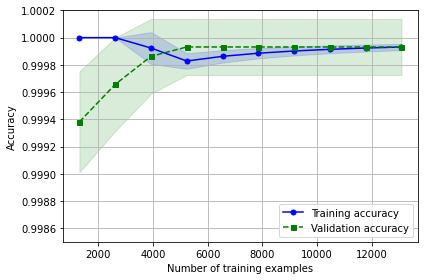

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9985, 1.0002])
plt.tight_layout()
plt.show()